# Import necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read a grayscale image and perform the following operations

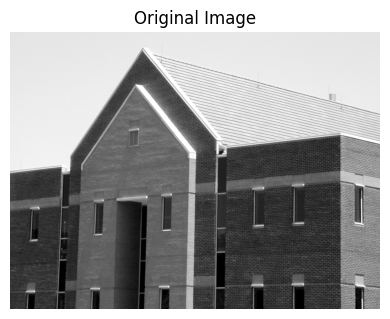

In [2]:
img = cv2.imread("building.tif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(4, 4))

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
def detect_edge(image, kernel_x, kernel_y):
    h, w = kernel_x.shape
    padded = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    gradient_x = np.zeros_like(image)
    gradient_y = np.zeros_like(image)

    # Apply convolution with kernels
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+h, j:j+w]
            gx = np.sum(region * kernel_x)
            gy = np.sum(region * kernel_y)
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    # Compute gradient magnitude
    magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude)) * 255

    return magnitude.astype(np.uint8)

# Sobel Edge detection function

In [4]:
def sobel_edge_detection(image):
    # Convert to float for accurate computation
    # image = img.copy(img)
    image = image.astype(np.float32)

    # Define Sobel kernels
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float32)

    sobel_y = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ], dtype=np.float32)

    return detect_edge(image, sobel_x, sobel_y)


# Prewitt Edge detection function

In [5]:
def prewitt_edge_detection(image):
    # Convert to float for accurate computation
    image = image.astype(np.float32)

    # Define prewitt kernels
    prewitt_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ], dtype=np.float32)

    prewitt_y = np.array([
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]
    ], dtype=np.float32)

    return detect_edge(image, prewitt_x, prewitt_y)


# Roberts Edge detection

In [6]:
def roberts_edge_detection(image):
    # Convert to float for accurate computation
    image = image.astype(np.float32)

    # Define robert kernels
    robert_x = np.array([
        [-1, 0],
        [0, 1]
    ], dtype=np.float32)

    robert_y = np.array([
        [0, -1],
        [1,  0]
    ], dtype=np.float32)

    return detect_edge(image, robert_x, robert_y)

# (a) Compare different edge detection algorithms implemented in spatial domain

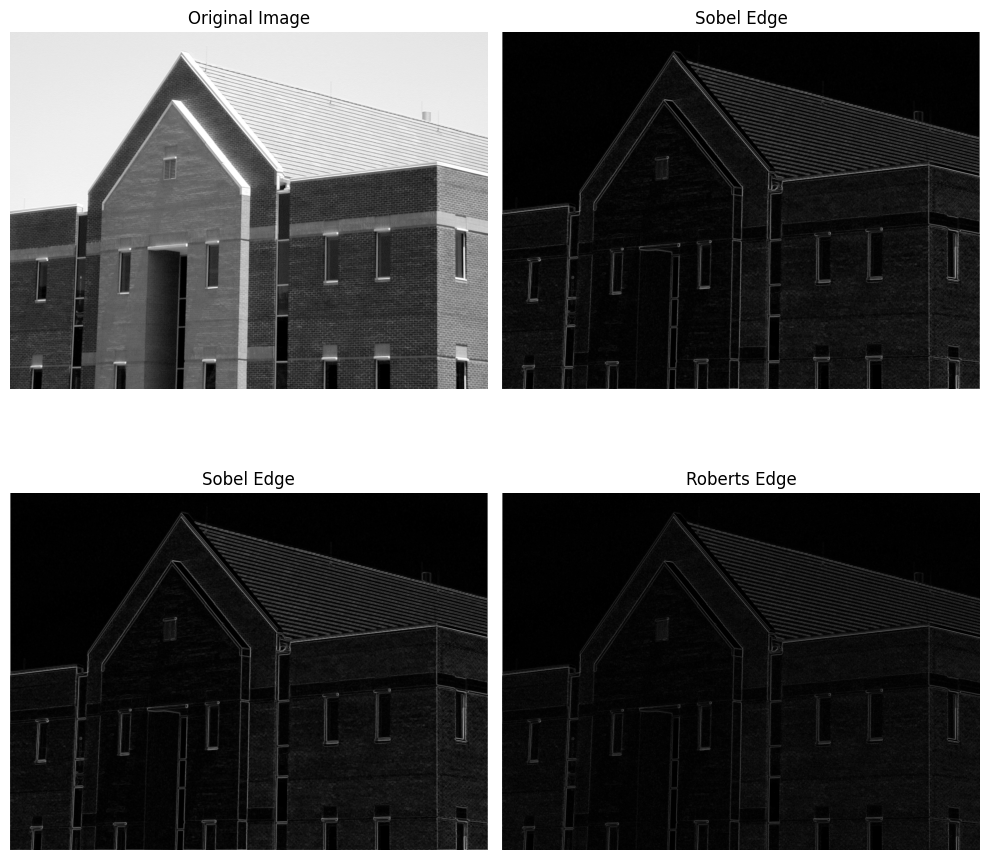

In [7]:
sobel_edge = sobel_edge_detection(img)
prewitt_edge = prewitt_edge_detection(img)
roberts_edge = roberts_edge_detection(img)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title("Sobel Edge")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title("Sobel Edge")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge')
plt.axis('off')

plt.tight_layout()
plt.show()


# (b) Illustrate the segmentation based on gray level.

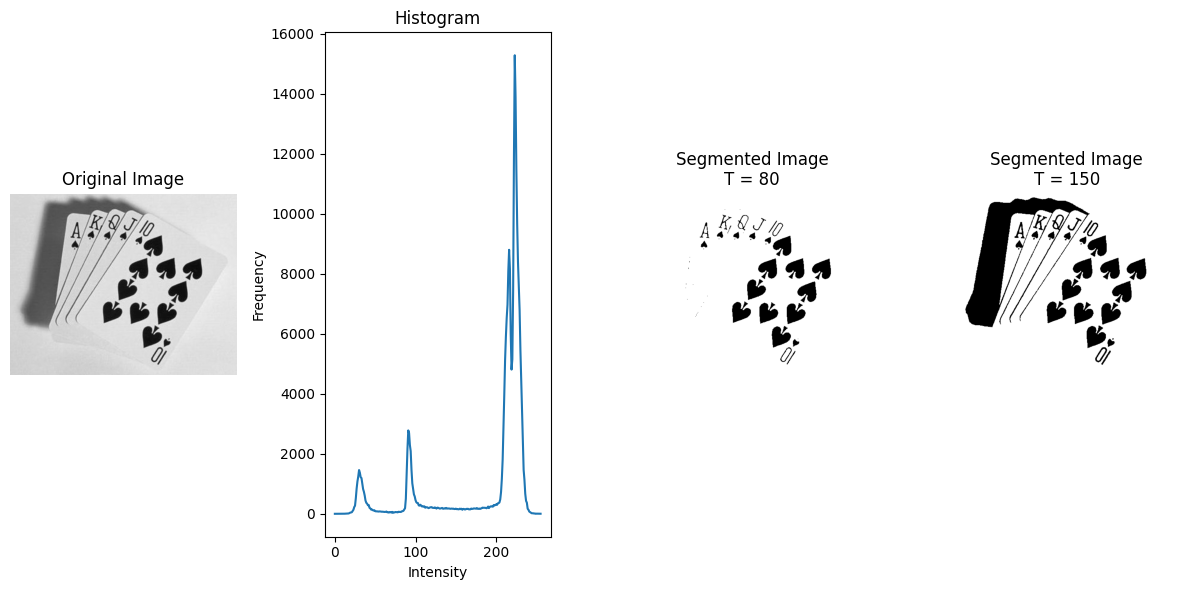

In [8]:
img = cv2.imread("cards.tif", cv2.IMREAD_GRAYSCALE)

hist = np.zeros(256)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1

segment_t150 = np.zeros_like(img, dtype=np.uint8)
segment_t150[img > 150] = 255

segment_t80 = np.zeros_like(img, dtype=np.uint8)
segment_t80[img > 80] = 255

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 4, 3)
plt.imshow(segment_t80, cmap='gray')
plt.title("Segmented Image\nT = 80")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(segment_t150, cmap='gray')
plt.title("Segmented Image\nT = 150")
plt.axis('off')

plt.tight_layout()
plt.show()

# Basic global thresholding algorithm

In [9]:
def basic_global_thresholding(image, max_iterations = 100, epsilon = 0.5):
    T = np.mean(image)

    for _ in range(max_iterations):
        G1 = image[image > T]
        G2 = image[image <= T]

        mu1 = np.mean(G1)
        mu2 = np.mean(G2)

        new_T = (mu1 + mu2) / 2

        if abs(new_T - T) < epsilon:
            break

        T = new_T

    segmented = np.uint8(image > T) * 255
    return segmented, T

# (c) Implement image segmentation using basic global thresholding algorithm

Threshold value: 125.64968454931093


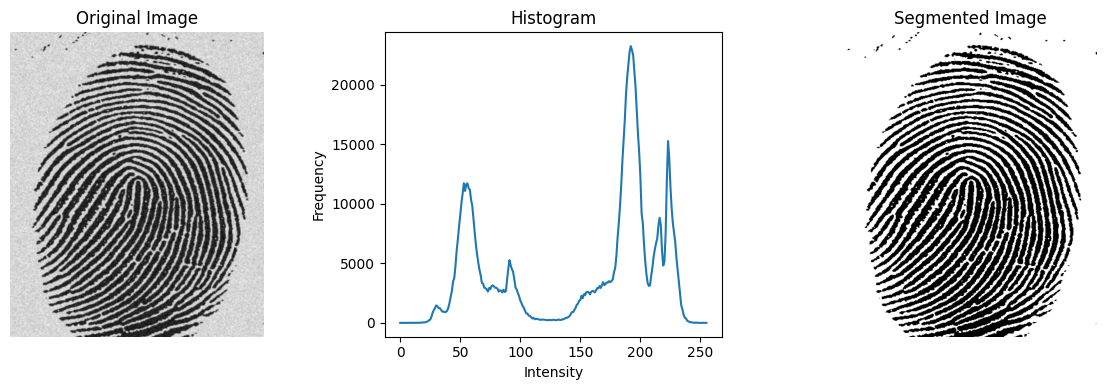

In [10]:
img = cv2.imread("fingerprint_seg.tif", cv2.IMREAD_GRAYSCALE)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1

segmented, T = basic_global_thresholding(img)
print(f"Threshold value: {T}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
def adaptive_thresholding(image, block_size=64):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.uint8)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract sub-image
            sub_img = image[i:i+block_size, j:j+block_size]
            # Apply basic thresholding
            thresholded_block, _ = basic_global_thresholding(sub_img)
            result[i:i+block_size, j:j+block_size] = thresholded_block

    return result


# (d) Demonstrate the segmentation by adaptive thresholding

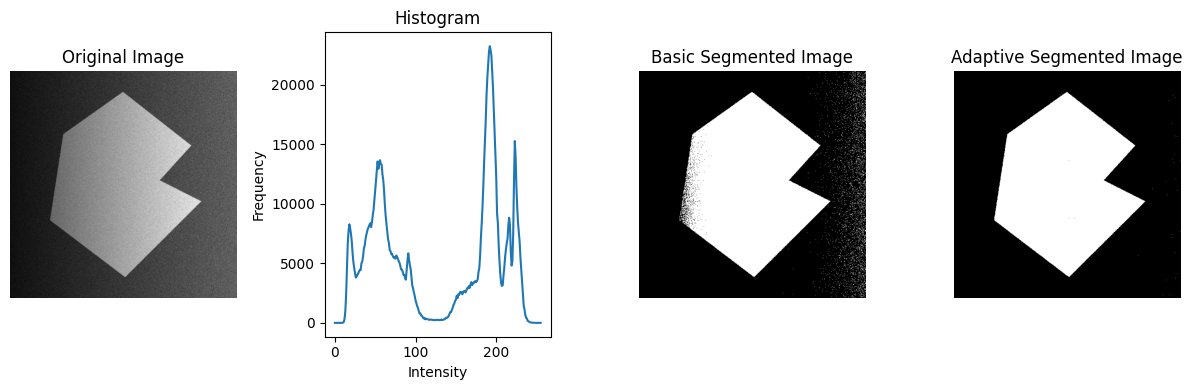

In [12]:
img = cv2.imread("noisy_septagon.tif", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1

basic_segmented, _ = basic_global_thresholding(img)
adaptive_segmented = adaptive_thresholding(img, 256)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 4, 3)
plt.imshow(basic_segmented, cmap='gray')
plt.title("Basic Segmented Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(adaptive_segmented, cmap='gray')
plt.title("Adaptive Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()